In [47]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import matplotlib

sys.path.append("../")
import src.plot as myplot
import seaborn as sns


In [15]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/plot.py'>

In [16]:
samples_path = '../OUTPUT/sample_sizes/'
fname = 'MCMs_'

In [17]:
# 2. For a sample size, compute the fraction of correct members in the group of each icc
# that is get the partition map and check fraction overlap between rows in where the 1s are excluding diagonal
nr_runs = 10
digit = 0

sample_sizes = [10, 1000 ,2000,3000, 5423]
# sample_sizes = [10, 1000 ,2000,3000, 6315]

coo_sum = np.empty((5,121,121),dtype=int)
n_samples = 10
mcm_all_com = []
for s, sample_size in enumerate(sample_sizes):
    # load runs
    mcm_sample = []
    mcms_path = os.path.join(samples_path, str(sample_size), "MCMs")
    for i in range(n_samples): #len(os.listdir(mcms_path))):
        with open(os.path.join(mcms_path, fname+str(i)+ ".json")) as f:
                mcm_sample.append(json.load(f))
    mcm_0_multisample = np.array([myplot.create_cooccurance_matrix(mcm_sample[i][digit]) for i in range(nr_runs)],dtype=int)
    coo_sum[s,:,:] = np.sum(mcm_0_multisample,axis=0)
    mcm_all_com.append(mcm_sample)




In [26]:
np.argsort([1,2,3])

array([0, 1, 2])

Standard Deviation per Row at 5423:
[120   0  10   1  33  22 110  11   2 119 109  12  99 111   3  17  43  18
  29   5  85  62  15  50  25  21   9   8   6  28   7  45  35   4  44  55
 117  27  51  40  20  79 118  98 108  16  95  32  89  87  74  39  66  77
  88  68  80  36 104 114  46  90 103 102  86 100  26  14  24  49 107  97
  57  19  37  82  13  23  34  69  58  61  63 105 112  47  38 115 116  72
 106  31  91  54  76  65  41  30  48  59  73 113  71  60  81  70 101  56
  67  78  42  96  83  52  94  93  92  64  75  53  84]
0


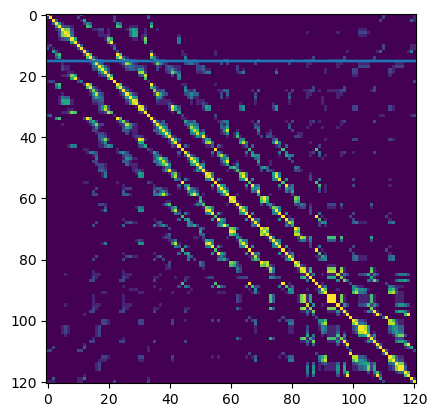

In [166]:
import numpy as np
arr = coo_sum[-1,:,:]
std_per_row = np.std(arr, axis=1)
min_per_row = np.min(arr, axis=1)
max_per_row = np.max(arr, axis=1)

print("Standard Deviation per Row at 5423:")

res = np.argsort(std_per_row)
print(res)
# print("Minimum per Row:")
print(np.argmax(min_per_row))

# print("Maximum per Row:")
# print(np.argmax(max_per_row))

plt.imshow(arr)
for i in res[:10]:
    plt.axhline(15)

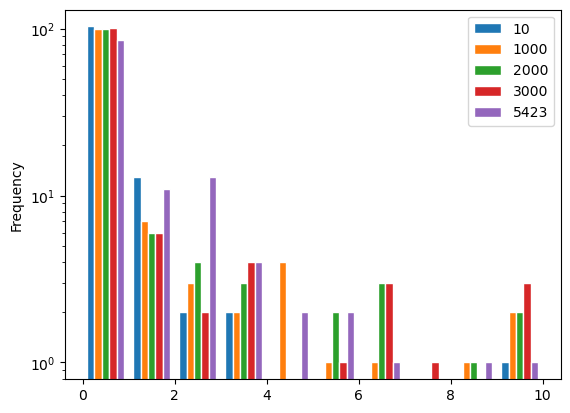

In [169]:
r = 15

cmap = matplotlib.colormaps["viridis_r"]
colors = [cmap(i) for i in np.linspace(0,1,coo_sum.shape[0])]

fig, ax = plt.subplots()

# [coo_sum[i, r, :] > 0]
res = [coo_sum[i, r, :] for i in range(coo_sum[:, r, :].shape[0])]

ax.hist(res,alpha=1,edgecolor="white", linewidth=1, stacked=False, density=False) #, color=colors[ss],histtype="barstacked", bins=10)
ax.set_xlabel("")
ax.set_yscale("log")

# ax.set_xscale("log")
ax.set_ylabel("Frequency")
legend_dict = {sample_sizes[i]:c for i,c in enumerate(colors)}
ax.legend(legend_dict)
plt.show()


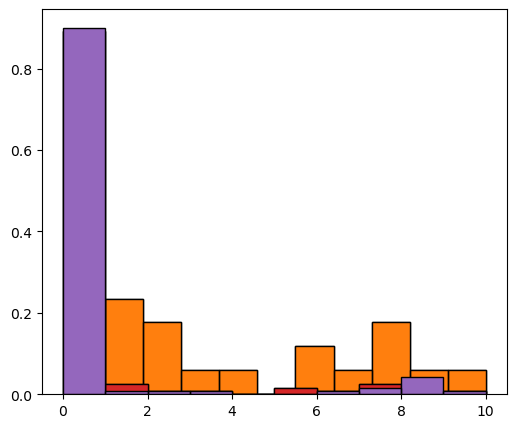

In [85]:
h = 5
ratio  = 1.2
cols = 1
fig, axs = plt.subplots(1, cols, figsize=(ratio*h*cols, h))
axs = [axs]
ax = axs[0]


series1 = res[res>0]
for ss in range(coo_sum.shape[0]):
    if ss not in [1,0,3]:
        series1 = coo_sum[ss, r, :]


    heights, bins = np.histogram(series1*-1, weights=np.ones(len(series1)) / len(series1), bins=10) 
    bin_width = np.diff(bins)[0]
    bin_pos =( bins[:-1] + bin_width / 2) * -1
    ax.bar(bin_pos, heights, width=bin_width)
    ax.bar( bin_pos, heights, width=bin_width, color='none', edgecolor='black')


In [ ]:
7